# Hough Transform

[Hough transform](https://en.wikipedia.org/wiki/Hough_transform) implementation in python. For study only. 

For serious work check the [opencv](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html) or [scikit-image ](http://scikit-image.org/docs/dev/auto_examples/plot_line_hough_transform.html) implementation.

Also: [Understanding Hough Transform With Python](https://alyssaq.github.io/2014/understanding-hough-transform/)

## Dependencies

- NumPy
- OpenCV

## Parameters

- image: grayscale image
- rho_resolution: number of bins in the accumulator for ρ (default = 180)
- theta_resolution: number of bins in the accumulator for ϴ (default = 180)
- thershold: the minimum pixel value to be considered (default = 255)

## Returns

- numpy.ndarray of shape (ρ,ϴ) representing the accumulator.

In [1]:
import numpy as np
import cv2

In [2]:
%matplotlib inline

In [3]:
def hough_transform(image, rho_resolution=180, theta_resolution=180, threshold=255):
    
    #create the accumulator
    accumulator = np.zeros((rho_resolution,theta_resolution), dtype=np.uint64)
    
    #pick the pixels to take into consideration
    pixels = np.argwhere(image >= threshold)
    
    #pre-compute the values that are going to be used over and over in the nested loop
    height, width = image.shape
    diag_len = np.sqrt(width * width + height * height)
    thetas = np.deg2rad(np.linspace(-90,90,theta_resolution))
    cos_theta = np.cos(thetas)
    sin_theta = np.sin(thetas)    
    
    #for each pixel brighter than the threshold calculate ρ for each ϴ, then increment the accumulator
    for pixel in pixels:
        for t in range(theta_resolution):
            r = int((pixel[1] * cos_theta[t] + pixel[0] * sin_theta[t])*rho_resolution/diag_len)
            accumulator[r, t] += 1
   
    return accumulator

##  Return the dominant line

Return the line in [Hesse normal form](https://en.wikipedia.org/wiki/Hesse_normal_form) for to the bin in the accumulator with the most votes.

Returns:
ρ: numpy.float64 - distance in pixels
ϴ: numpy.float64 - angle in radians

In [4]:
def return_dominant_line(accumulator,img_shape):
    
    #the position of the bin in the accumulator with the highest number of votes
    a,b = divmod(np.argmax(accumulator), accumulator.shape[1])
    c,d = accumulator.shape
    r = a*1.0/c
    t = b*1.0/d
    
    #calculate the diagonal length of the image
    height = img_shape[0]
    width = img_shape[1]
    diagonal_lenght = np.sqrt(width * width + height * height)
    
    #the absolute values of ρ and ϴ
    r = (r) * diagonal_lenght
    t = (t-0.5) * np.pi
    
    return r,t

##  Return two points the line passes through

Two points on the line are needed to plot the segment.

Returns: list of two tuples representing the x,y coordinates

In [5]:
def line_coordinates(r,t,shape):
    
    height = shape[0]
    width = shape[1]    
    
    #calculate the cooridnates where the line intersects the edges    
    x1 = r/np.cos(t)
    x2 = (r-height*np.sin(t))/np.cos(t)
    y1 = r/np.sin(t)
    y2 = (r-width*np.cos(t))/np.sin(t)
    
    coordinates = [(0,int(y1)),(width,int(y2)),(int(x1),0),(int(x2),height)]
    
    #find the two points furthest apart, to make sure the line intersects the image
    max = 0    
    for i in range(0,4):
        for j in range(i+1,4):
            distance = (coordinates[i][0]-coordinates[j][0])*(coordinates[i][0]-coordinates[j][0])+(coordinates[i][1]-coordinates[j][1])*(coordinates[i][1]-coordinates[j][1])
            if distance > max:
                max = distance
                result = [coordinates[i],coordinates[j]]
                
    return result

# Examples

In [6]:
import matplotlib.pyplot as plt

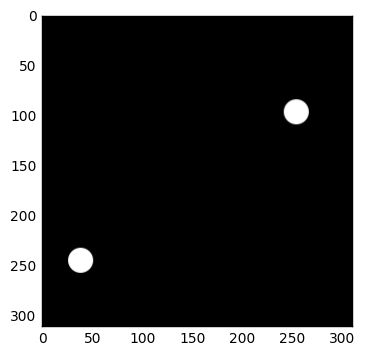

In [7]:
img = cv2.imread("./test_images/a.png",0)
plt.imshow(img, cmap='gray')

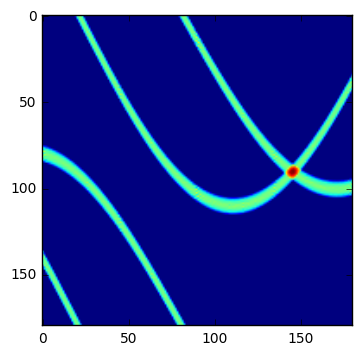

In [8]:
accumulator = hough_transform(img,180,180,255)
plt.imshow(accumulator)

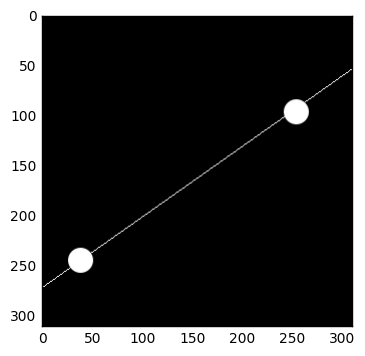

In [9]:
line_image = np.copy(img)

r,t = return_dominant_line(accumulator,img.shape)

[(x1,y1),(x2,y2)] = line_coordinates(r,t,img.shape)
    
cv2.line(line_image,(x1,y1),(x2,y2),255,1)
    
plt.figure()
plt.imshow(line_image, cmap='gray')

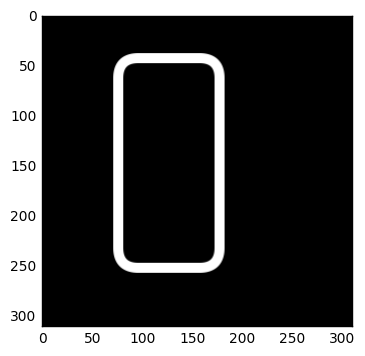

In [10]:
img = cv2.imread("./test_images/b.png",0)
plt.imshow(img, cmap='gray')

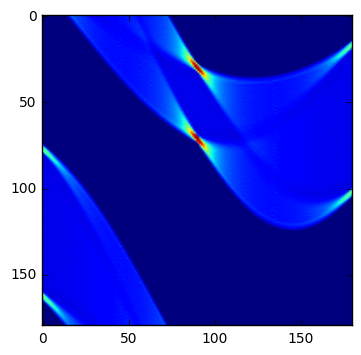

In [11]:
accumulator = hough_transform(img,180,180,255)
plt.imshow(accumulator)

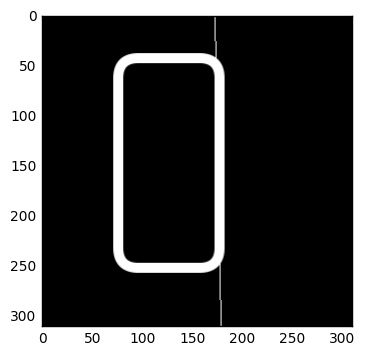

In [12]:
line_image = np.copy(img)

r,t = return_dominant_line(accumulator,img.shape)

[(x1,y1),(x2,y2)] = line_coordinates(r,t,img.shape)
    
cv2.line(line_image,(x1,y1),(x2,y2),255,1)
    
plt.figure()
plt.imshow(line_image, cmap='gray')

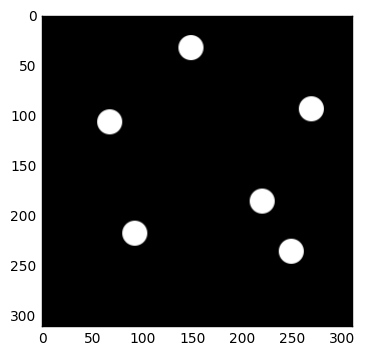

In [13]:
img = cv2.imread("./test_images/c.png",0)
plt.imshow(img, cmap='gray')

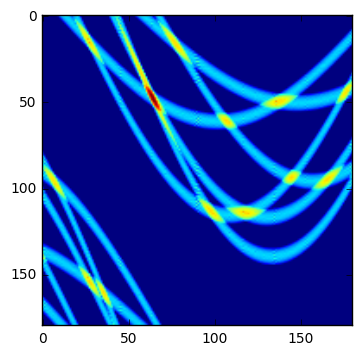

In [14]:
accumulator = hough_transform(img,180,180,255)
plt.imshow(accumulator)

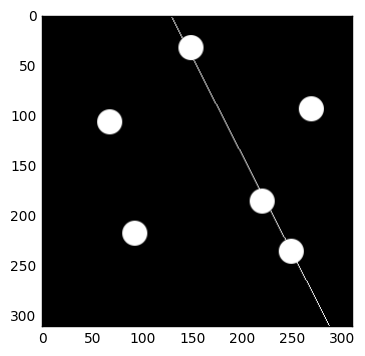

In [15]:
line_image = np.copy(img)

r,t = return_dominant_line(accumulator,img.shape)

[(x1,y1),(x2,y2)] = line_coordinates(r,t,img.shape)
    
cv2.line(line_image,(x1,y1),(x2,y2),255,1)
    
plt.figure()
plt.imshow(line_image, cmap='gray')